### Dataset description:
https://www.drivendata.org/competitions/57/nepal-earthquake/

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. Categorical variables have been transformed to random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

The goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal. Hence, Damage_grade is the target variable we have to classify.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn

#### 1. Take a subset of the dataset(5-10% of the whole dataset free to do this on whole dataset, given the memory requirements)).

In [2]:
gorkha = pd.read_csv("train_values.csv",sep = ',')
damage = pd.read_csv("train_labels.csv",sep = ',')

In [3]:
gorkha.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
damage.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
earthquake = pd.merge(gorkha,damage,on=['building_id'])
earthquake.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
earthquake.shape

(260601, 40)

In [7]:
#Step0
#Creating subset of 10% of the dataset
equake_sample = earthquake.sample(frac =.05) 
print(equake_sample.shape)

(13030, 40)


#### Finding Features to be used in the model.

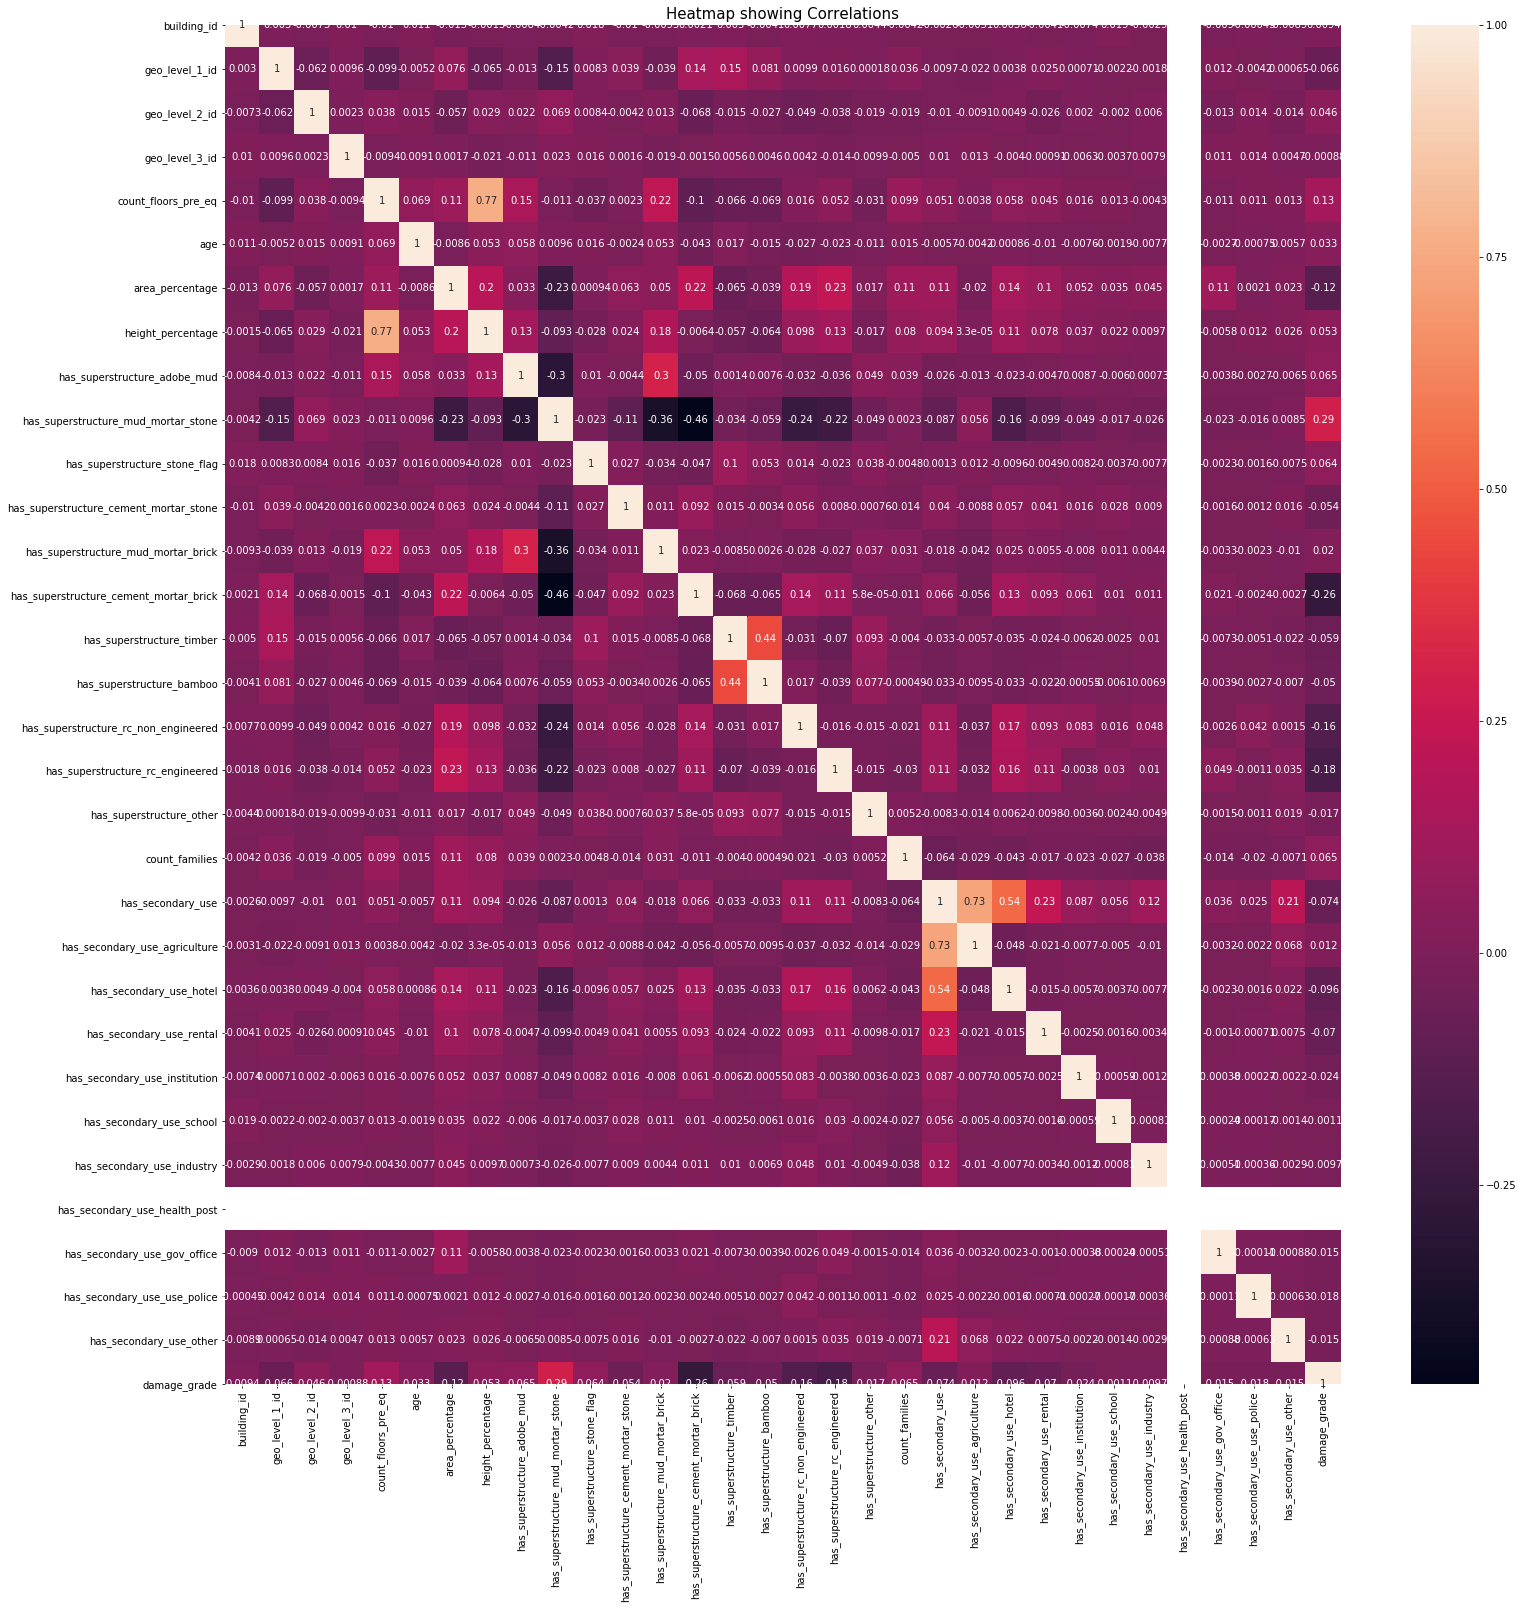

In [8]:
#Step1
plt.figure(figsize=(25,25))
sns.heatmap(equake_sample.corr(),annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show()

In [9]:
equake_sample.drop(['count_floors_pre_eq','has_secondary_use','building_id'],axis = 1,inplace= True)
equake_sample.head(3)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
127960,10,1174,7207,0,3,3,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
169332,27,422,5920,40,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
241054,9,230,8178,0,11,3,t,w,n,v,...,0,0,0,0,0,0,0,0,0,2


height_percentage & count_floors_per_eq were highly correlated with a correlation value of 0.77 and also, has_secondary_use & has_secondary_use_agriculture had strong correlation with a value of 0.73. Hence, dropped columns count_floors_pre_eq and has_secondary_use. Also dropped building_id because it is not relavant.

The repeating features in the model like has_secondary_use_ agriculture/police/hotel/other etc. provides information that is also provided by has_secondary_use and has decent correlation with it. Since, we have removed has_secondary_use due to high correation above, hence, we can keep the other repeating features.The redundant information is removed and the other repeating fetaures can provide insights to the model.

#### 2. Data Preprocessing.

#### A.Convert percentage to value/100.

In [10]:
equake_sample['area_percentage'] = equake_sample['area_percentage']/100
equake_sample['height_percentage'] = equake_sample['height_percentage']/100

In [11]:
print(equake_sample.shape)
equake_sample.head()

(13030, 37)


,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
127960,10,1174,7207,0,0.03,0.03,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
169332,27,422,5920,40,0.06,0.05,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
241054,9,230,8178,0,0.11,0.03,t,w,n,v,...,0,0,0,0,0,0,0,0,0,2
190492,17,1183,6316,10,0.07,0.05,n,r,n,f,...,0,0,0,0,0,0,0,0,0,3
191930,7,555,11805,995,0.09,0.07,t,u,x,v,...,0,0,0,0,0,0,0,0,0,1


#### B.Make an 80-20 stratified split based on the target variable(categorical variable)

In [12]:
from sklearn.model_selection import train_test_split

#splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(equake_sample.iloc[:,0:36], equake_sample.iloc[:,-1],stratify = equake_sample['damage_grade'], test_size=0.2, shuffle = True)

#### C.Showing the stratified split on merged dataset, train and test set. (displaying the ratio of classes on each dataset)

In [13]:
#checking the split
print(equake_sample["damage_grade"].value_counts()/len(equake_sample))
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

2    0.570606
3    0.332540
1    0.096853
Name: damage_grade, dtype: float64
2    0.570606
3    0.332502
1    0.096892
Name: damage_grade, dtype: float64
2    0.570606
3    0.332694
1    0.096700
Name: damage_grade, dtype: float64


#### D. Encoding the categorical features & Standardizing the numerical features

In [14]:
#2-D&E)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attr = ["age", "area_percentage", "height_percentage", "count_families"]
cat_attr = ["land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration","legal_ownership_status"]

full_pipeline = ColumnTransformer([
 ("num", StandardScaler(), num_attr),
 ("cat", OneHotEncoder(), cat_attr),
 ])
X_train_tr = full_pipeline.fit_transform(X_train)
X_test_tr = full_pipeline.transform(X_test)

print(X_train_tr.shape)
print(X_test_tr.shape)

(10424, 42)
(2606, 42)


#### 3.Building a SVM Classifier, training and evaluating the model. 

In [21]:
#3A)
from sklearn.svm import SVC

svm_clf = SVC(kernel="poly", degree=3, coef0=3, C=2)
svm_clf.fit(X_train_tr, y_train)

C:\Users\Vikanksha Goley\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2, cache_size=200, class_weight=None, coef0=3,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred_train = svm_clf.predict(X_train_tr)
y_pred_test = svm_clf.predict(X_test_tr)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error

print("\nConfusion Matrix for prediction on testing data:\n")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report for training data prediction:\n",classification_report(y_train, y_pred_train)) 
print("\nClassification Report for testing data prediction:\n",classification_report(y_test, y_pred_test)) 

print("Accuracy:",accuracy_score(y_test, y_pred_test))


Confusion Matrix for prediction on testing data:

[[  65  186    1]
 [  60 1404   23]
 [  10  827   30]]

Classification Report for training data prediction:
               precision    recall  f1-score   support

           1       0.64      0.32      0.42      1010
           2       0.59      0.96      0.73      5948
           3       0.63      0.04      0.08      3466

    accuracy                           0.59     10424
   macro avg       0.62      0.44      0.41     10424
weighted avg       0.61      0.59      0.48     10424


Classification Report for testing data prediction:
               precision    recall  f1-score   support

           1       0.48      0.26      0.34       252
           2       0.58      0.94      0.72      1487
           3       0.56      0.03      0.07       867

    accuracy                           0.58      2606
   macro avg       0.54      0.41      0.37      2606
weighted avg       0.56      0.58      0.46      2606

Accuracy: 0.5752110514198

To evaluate my model, I have used confusion matrix, classification report and accuracy score. I have used these metrices since the problem statement is of classification and these metrices are used to evaluate the classification models. The accuracy on testing data comes out to be 57.521%.

#### B. Hyper Parameter Tuning.

In [26]:
#3B)
#Hyper-parameters tuning in SVC using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

parameters = {'C': [1, 5, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']
             }
search = RandomizedSearchCV(estimator=svm_clf, param_distributions = parameters, cv = 3, n_iter = 5, n_jobs=-1)
result = search.fit(X_train_tr, y_train)

# summarize result
print(" \nResults from Randomized Search:\n" )
print('Best Score: %s' % result.best_score_)
print('\nBest Hyperparameters: %s' % result.best_params_)

 
Results from Randomized Search:

Best Score: 0.5834612432847276

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


Some of the hyperparameter that can be tuned in SVM are C, class_weight, coef0, decision_function_shape, degree, gamma,
kernel, max_iter, probability, random_state, shrinking and tol.

I have tried tuning C, gamma and kernel parameters here.
The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.  A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. 

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The kernel function computes the inner-product between two projected vectors. We have used Radial based function kernel here.

After hyper parameter tuning, the best parameter values chosen are for C=1, Kernel=rbf and gamma=0.1.

In [27]:
svm_clf = SVC(kernel="rbf", degree=3, coef0=1, C=1, gamma=0.1)
svm_clf.fit(X_train_tr, y_train)
y_pred_test = svm_clf.predict(X_test_tr)

print("\nConfusion Matrix for prediction on testing data:\n")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report for prediction on testing data:\n")
print(classification_report(y_test, y_pred_test)) 

print("Accuracy:",accuracy_score(y_test, y_pred_test))


Confusion Matrix for prediction on testing data:

[[  61  191    0]
 [  50 1416   21]
 [   7  830   30]]

Classification Report for prediction on testing data:

              precision    recall  f1-score   support

           1       0.52      0.24      0.33       252
           2       0.58      0.95      0.72      1487
           3       0.59      0.03      0.07       867

    accuracy                           0.58      2606
   macro avg       0.56      0.41      0.37      2606
weighted avg       0.58      0.58      0.47      2606

Accuracy: 0.5782808902532617


After hyper parameter tuning, the model accuracy still is 57.828% which is very slightly better than that before tuning. Hence, in this case hyper parameter tuning is not providing much help to the SVM model. 

#### C. Learning curve on the optimized model.

C:\Users\Vikanksha Goley\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Vikanksha Goley\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Vikanksha Goley\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Vikanksha Goley\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:

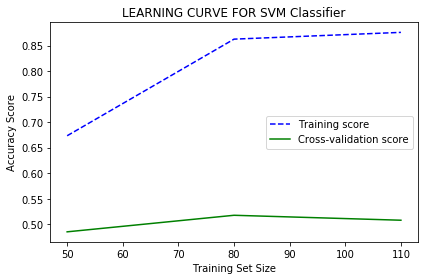

In [28]:
#3C)
from sklearn.model_selection import learning_curve
#sizes, training_scores, testing_scores = learning_curve(svm_clf, X_train_tr, y_train, cv=3, scoring='accuracy', 
#                                                        train_sizes=np.linspace(0.01, 1.0, 50)) 
sizes, training_scores, testing_scores = learning_curve(search, X_train_tr, y_train, 
                                                         train_sizes=[50, 80, 110], cv=3)
  
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR SVM Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

Learning curves give us an opportunity to diagnose bias and variance in supervised learning models.
The learning curve above shows a curve rather than a flat line, which shows that my model can learn further and provide further improvements if it is allowed to execute further and the process is not stopped immaturely.

#### 4.Building a Decision Tree Classifier, training and evaluating the model.

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'gini',max_depth=5,min_samples_leaf=3)
dt.fit(X_train_tr,y_train)
tree_test_pred = dt.predict(X_test_tr)

print("\nConfusion Matrix is:\n",confusion_matrix(y_test,tree_test_pred))
print("\nClassification Report is:\n",classification_report(y_test,tree_test_pred))
print("Accuracy:",accuracy_score(y_test, tree_test_pred))


Confusion Matrix is:
 [[  79  172    1]
 [  71 1406   10]
 [  14  844    9]]

Classification Report is:
               precision    recall  f1-score   support

           1       0.48      0.31      0.38       252
           2       0.58      0.95      0.72      1487
           3       0.45      0.01      0.02       867

    accuracy                           0.57      2606
   macro avg       0.50      0.42      0.37      2606
weighted avg       0.53      0.57      0.45      2606

Accuracy: 0.5732924021488872


To evaluate my model, I have used confusion matrix, classification report and accuracy score. I have used these metrices since the problem statement is of classification and these metrices are used to evaluate the classification models. The accuracy on testing data comes out to be 57.329%.

#### B. Hyper Parameter Tuning.

In [43]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)),
          'min_samples_split': [2,3,4],
          "criterion": ["entropy"]}

gridDTree = GridSearchCV(DecisionTreeClassifier(random_state=32), params, verbose=1, cv=3)

gridDTree.fit(X_train_tr,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   30.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=32,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
       

In [44]:
gridDTree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=35,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=32, splitter='best')

The hyperparameter that can be tuned in Decision Trees are class_weight, criterion, max_depth,max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split, min_samples_leaf, min_samples_split, min_weight_fraction_leaf, presort, random_state and splitter.

I have tried tuning  max_leaf_nodes, min_samples_split and criterion here. 

Criterion Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. It basically means that impurity increases with randomness. The other function to evaluate the quality of a split is entropy which is a measure of uncertainty or randomness. The more randomness a variable has, the higher the entropy is.

max_leaf_nodes parameter limits the number of leaf nodes and lets the tree grow the tree until max_leaf_nodes reached.

min_samples_split parameter tellstThe minimum number of samples required to split an internal node.

After hyper parameter tuning, the best parameter values chosen are for max_leaf_nodes=35, criterion='entropy' and min_samples_split=2.

In [46]:
dt = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=35,min_samples_split=2)
dt.fit(X_train_tr,y_train)
tree_test_pred = dt.predict(X_test_tr)

print("\nConfusion Matrix on testing data:\n",confusion_matrix(y_test,tree_test_pred))
print("\nClassification Report on testing data:\n",classification_report(y_test,tree_test_pred))
print("Accuracy:",accuracy_score(y_test, tree_test_pred))


Confusion Matrix on testing data:
 [[  76  173    3]
 [  65 1377   45]
 [  13  809   45]]

Classification Report on testing data:
               precision    recall  f1-score   support

           1       0.49      0.30      0.37       252
           2       0.58      0.93      0.72      1487
           3       0.48      0.05      0.09       867

    accuracy                           0.57      2606
   macro avg       0.52      0.43      0.39      2606
weighted avg       0.54      0.57      0.48      2606

Accuracy: 0.5748273215656178


After hyper parameter tuning, the model accuracy still is 57.482% which is very slightly better than that before tuning. Hence, in this case hyper parameter tuning is not providing much help to the Decision Trees model.

#### C.Comparing the Model Evaluation metric of both the models.

Looking at the model evaluation metrics, I can say that both SVM and Decision Trees classifier provided almost similar results in this case.
Both gives an accuracy of around 57% and also, looking at confusion_matrix  and classification_report I can say that there is not much difference in the peformance of both the models. 